In [4]:
#!cp 0-convolve_grayscale_valid.py 1-convolve_grayscale_same.py
!chmod +x *.py

(50000, 28, 28)
(50000, 26, 26)


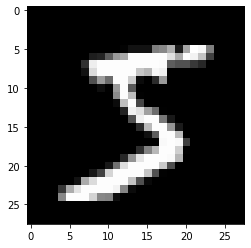

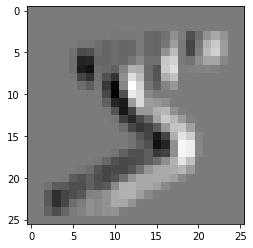

In [23]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid
def convolve_grayscale_valid(images, kernel):
    """ doc """
    m, h, w = images.shape
    kh, kw = kernel.shape
    imgh, imgw = h - kh + 1, w - kw + 1
    output = np.zeros((m, imgh, imgw))
    for i in range(imgh):
        for j in range(imgw):
            output[:, i, j] = np.tensordot(images[:,
                                                  i:i+kh,
                                                  j:j+kw],
                                                  kernel)
    return output

"""for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()"""
if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_valid(images, kernel)
    #print(images_conv)
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

In [38]:
ar = [
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ],
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ]
    ]
import numpy as np
arr = np.array(ar)
arr.shape
k = [
    [1,2,3],
    [1,2,3],
    [1,2,3],
]
for i in range(arr.shape[0]):
    g = arr[i]
    print(g[i:i+3, i:i+3]*k)

[[ 1  6 18]
 [ 1  6 18]
 [ 1  6 18]]
[[ 3 12 27]
 [ 3 12 27]
 [ 3 12 27]]


(50000, 28, 28)
(50000, 28, 28)


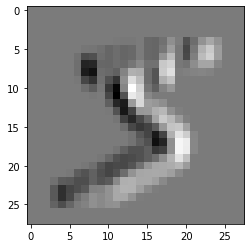

In [20]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
#convolve_grayscale_same = __import__('1-convolve_grayscale_same').convolve_grayscale_same
def convolve_grayscale_same(images, kernel):
    """ doc """
    m, h, w = images.shape
    kh, kw = kernel.shape
    imghp, imgwp = kh//2, kw//2
    output = np.zeros((m, h, w))
    new = np.pad(images, ((0, 0), (imghp, imghp), (imgwp, imgwp)), 'constant')
    for i in range(h):
        for j in range(w):
            output[:, i, j] = np.tensordot(new[:,
                                         i:i+kh,
                                         j:j+kw],
                                         kernel)
    return output

if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_same(images, kernel)
    print(images_conv.shape)

    #plt.imshow(images[0], cmap='gray')
    #plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()


3